In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

In [2]:
boston = load_boston()

In [44]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
boston_df = pd.DataFrame( boston['data'] , columns = boston['feature_names'])
boston_df['MEDV'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [63]:
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:,-1]

In [65]:
x_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
y_data

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## make_pipeline

In [13]:
from sklearn.pipeline import make_pipeline

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

In [16]:
# pipeline을 사용하면 앞쪽의 함수로 스케일링 한뒤, 뒤의 파라미터 함수를 적용하여 예측한다
# 한번에 여러과정을 수행하기위해
model = make_pipeline( StandardScaler(), SGDRegressor() )
model.fit( x_train, y_train )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [18]:
print( model.score( x_train, y_train ))
print( model.score( x_test, y_test ))

0.727299354493198
0.7615542311820188


In [19]:
model.predict( [x_test.iloc[0]] )

array([31.78206294])

### 교차검증(데이터가작은경우)
- 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문
    에 훈련에 사용할 수 있는 양도 작아지고 분리가 잘 안된 경우에는 잘못된 검증이 될
    수 있음
    
- 이럴경우에는 테스트셋을 여러개로 구성하여 교차검증을 진행
- cross_val_score() 함수는 교차 검증을 수행하여 모델을 검증

In [20]:
from sklearn.model_selection import cross_val_score

In [25]:
# train,test나눈값을 넣는게 아니라 원데이터를 넣어야된다 
# (모델,x값,y값,cv=나눌덩어리갯수,scoring = r2,verbose = 학습이 되는내용이 찍힌다)
r2 = cross_val_score( model,x_data,y_data, cv = 10,scoring='r2', verbose = 1)
print(r2)
print(r2.mean())

[ 0.73608702  0.49796622 -1.00163957  0.6405076   0.56442215  0.7373064
  0.39119697 -0.12670368 -0.77855798  0.45890891]
0.21194940290400313


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


# 다중 공선성
다중 공선성: 회귀분석에서 사용된 모형의 일부 설명 변수가 다른 설명변수와 상관 정도가
            높아 데이터 분석시 부정적인 영향을 미치는 형상

X1은 일평균 음주량을 독립변수 X2는 혈중 알코올농도 둘의 상관관계가 높아 설명력이 약해진다

회귀 모델에서 다중공선성을 파악할 수 있는 대표적인 방법은 VIF입니다
VIF(Variance inflation Factors 분산 팽창요인)
- 안전 : VIF < 5
- 주의 : 5 < VIF <10
- 위험 : 10 < VIF

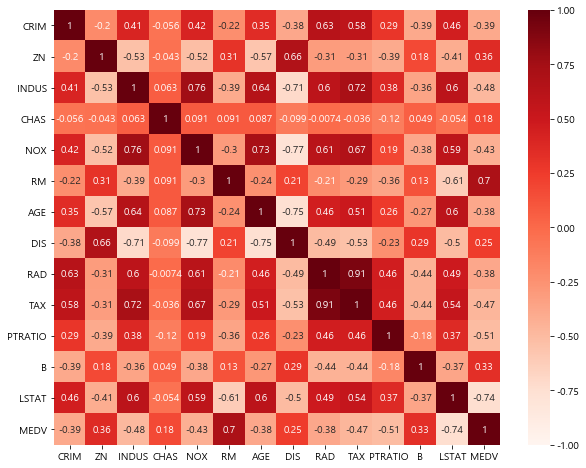

In [32]:
import seaborn as sns
plt.figure( figsize = (10,8) )
sns.heatmap(boston_df.corr(), annot = True,cmap = 'Reds', vmin= -1, vmax = 1)
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
boston_df.shape[1]

14

In [36]:
boston_df.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [37]:
vif = pd.DataFrame()
vif['VIF Factor'] = [ variance_inflation_factor(boston_df.values,i) for i in range( boston_df.shape[1] ) ]
vif['features'] = boston_df.columns

In [38]:
vif
# 특성데이터의 종류개수 가 많은경우: 다중공선성(컬럼제거), 
# 타겟(라벨)에 상관관계가 낮은 컬럼도 삭제

,VIF Factor,features
0,2.131404,CRIM
1,2.910004,ZN
2,14.485874,INDUS
3,1.176266,CHAS
4,74.004269,NOX
5,136.101743,RM
6,21.398863,AGE
7,15.430455,DIS
8,15.369980,RAD
9,61.939713,TAX


In [ ]:
## 캘리포니아 주택가격을 이용하여 crossvalidation, 다중공선성을 확인한후에
## 다중공선성이 높은 컬럼을 제외하고 학습하여 crossvalidation값을 확인

In [39]:
from sklearn.datasets import fetch_california_housing

In [41]:
cal = fetch_california_housing()
cal

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [47]:
cal_df = pd.DataFrame(cal['data'],columns = cal.feature_names)
cal_df['target'] = cal.target
cal_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [97]:
# 교차검증으로 변경된 x컬럼
# x_data = cal_df.iloc[:,:-1]
x_data = cal_df[cal_df.columns.difference(['Longitude','Latitude','target'])]
y_data = cal_df.iloc[:,-1]

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

In [99]:
# make_pipeline
calModel = make_pipeline(StandardScaler(), LinearRegression())
calModel.fit( x_train, y_train )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [101]:
print( calModel.score( x_train, y_train ))
print( calModel.score( x_test, y_test ))

0.5409848489986098
0.5332575128677687


In [100]:
# crossvalidation
# r2 = cross_val_score( model,x_data,y_data, cv = 10,scoring='r2', verbose = 1)
r2Score = cross_val_score( calModel, x_data , y_data, cv = 5 ,scoring = 'r2', verbose = 1)
print(r2Score)
print(r2Score.mean())

[0.51316586 0.44125064 0.50924807 0.45469149 0.53474157]
0.4906195253748445


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


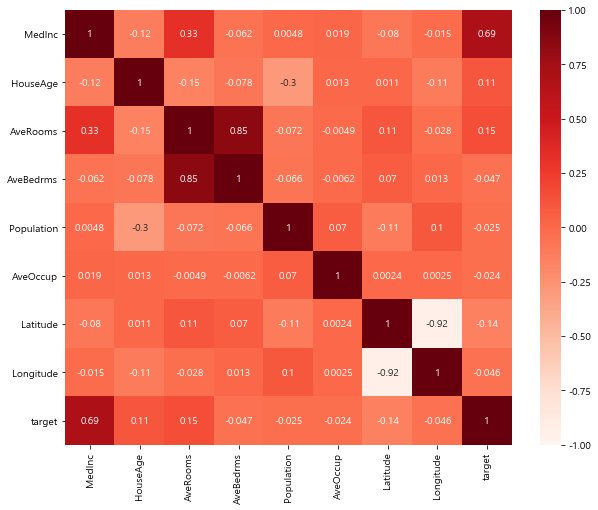

In [58]:
# 다중공선성 체크
plt.figure( figsize = (10,8) )
sns.heatmap(cal_df.corr(), annot = True,cmap = 'Reds', vmin= -1, vmax = 1)
plt.show()

In [59]:
# 다중공선성 체크
a = pd.DataFrame()
a['VIF'] = [variance_inflation_factor(cal_df.values,i) for i in range(cal_df.shape[1]) ]
a['features'] = cal_df.columns
a

,VIF,features
0,19.624998,MedInc
1,7.592663,HouseAge
2,47.956351,AveRooms
3,45.358192,AveBedrms
4,2.936078,Population
5,1.099530,AveOccup
6,568.497332,Latitude
7,640.064211,Longitude
8,9.285659,target


,AveBedrms,AveOccup,AveRooms,HouseAge,MedInc,Population,target
0,1.023810,2.555556,6.984127,41.0,8.3252,322.0,4.526
1,0.971880,2.109842,6.238137,21.0,8.3014,2401.0,3.585
2,1.073446,2.802260,8.288136,52.0,7.2574,496.0,3.521
3,1.073059,2.547945,5.817352,52.0,5.6431,558.0,3.413
4,1.081081,2.181467,6.281853,52.0,3.8462,565.0,3.422
...,...,...,...,...,...,...,...
20635,1.133333,2.560606,5.045455,25.0,1.5603,845.0,0.781
20636,1.315789,3.122807,6.114035,18.0,2.5568,356.0,0.771
20637,1.120092,2.325635,5.205543,17.0,1.7000,1007.0,0.923
20638,1.171920,2.123209,5.329513,18.0,1.8672,741.0,0.847
